<a href="https://colab.research.google.com/github/Luminary0528/Data-Science-Practice/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Types of Time Series Data
# Continuous Time Series

Regular intervals

Continuous values

Examples:
Temperature, stock prices, sensor readings

##Discrete Time Series

Specific time points

Distinct or categorical values

Examples:
Event counts, number of sales, status changes

##Visualization Approaches
#Line Plot / Area Chart

Used for continuous time series

Highlights trends and fluctuations

#Bar Chart / Histogram

Used for discrete time series

Shows frequency or distribution

#**Step 1: Installing and Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

### Libraries:
*   **`pandas`**: For efficient data handling, especially time-indexed data.
*   **`numpy`**: For fundamental numerical operations supporting data analysis.
*   **`matplotlib.pyplot`**: The foundational library for creating static plots.
*   **`seaborn`**: Builds on Matplotlib to create aesthetically pleasing and informative statistical graphics.
*   **`statsmodels.graphics.tsaplots.plot_acf`**: To plot the Autocorrelation Function, revealing patterns and dependencies in time series.
*   **`statsmodels.tsa.stattools.adfuller`**: To perform the Augmented Dickey-Fuller test, checking for time series stationarity.

### Key Time Series Visualization Terms:
*   **Time Series**: Data points ordered by time.
*   **Trend**: Long-term increase or decrease.
*   **Seasonality**: Repeating patterns at fixed intervals.
*   **Cyclicity**: Repeating patterns with unfixed intervals.
*   **Noise/Residuals**: Random fluctuations after accounting for patterns.
*   **Lag Plot**: Visualizes correlation between a series and its lagged values.
*   **Decomposition Plot**: Separates time series into trend, seasonality, and residuals.
*   **Stationarity**: Statistical properties of the series remain constant over time.

**Step 2: Loading the Dataset**

**Step 3: Cleaning of Data**

In [5]:
df = pd.read_csv("/content/NVIDIA.csv",
                 parse_dates=True,
                 index_col="Date")
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,138.272171,138.842022,134.593185,135.962805,198247200
2025-01-03,144.430496,144.860371,139.691787,139.971709,229322500
2025-01-06,149.389130,152.118394,147.779585,148.549363,265377400
2025-01-07,140.101669,153.088122,139.971700,152.988143,351782200
2025-01-08,140.071686,143.910632,137.522380,142.541012,227349900


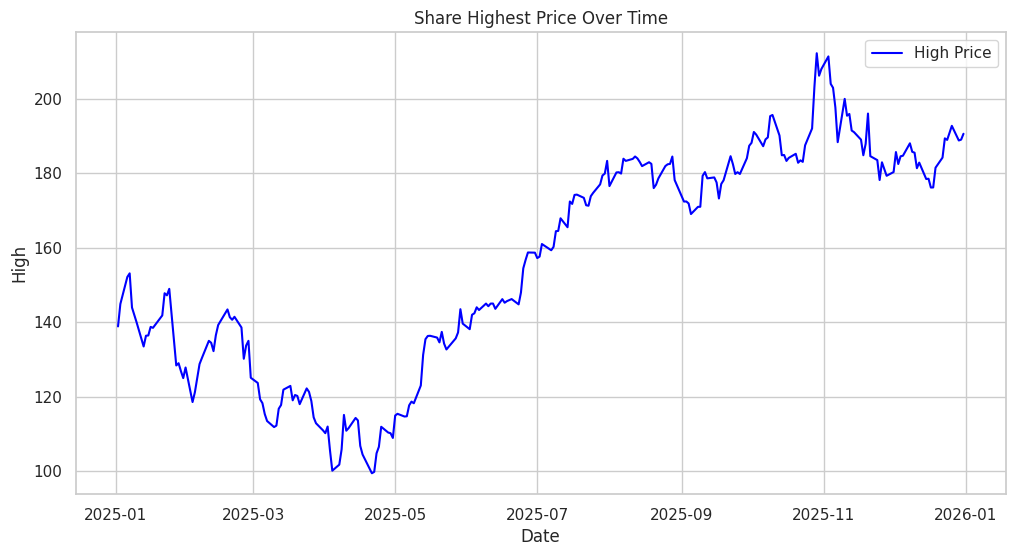

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

**Step 5: Resampling Data**

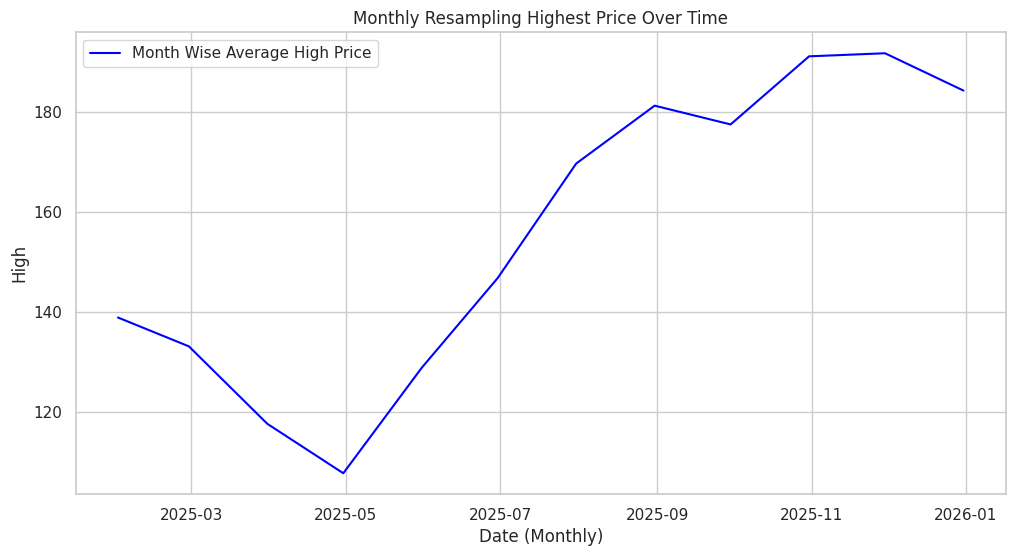

In [7]:
df_resampled = df.resample('ME').mean(numeric_only=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

**Step 6: Detecting Seasonality with Autocorrelation**

An **Autocorrelation Function (ACF) plot** shows the correlation between a time series and its past values (lags).

*   **Y-axis**: Autocorrelation coefficient (strength of correlation).
*   **X-axis**: Lag (number of past time periods).
*   **Purpose**: Helps identify patterns like seasonality, trends, and dependencies within time series data, crucial for forecasting and modeling. Bars extending beyond the shaded area indicate statistically significant correlations.

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

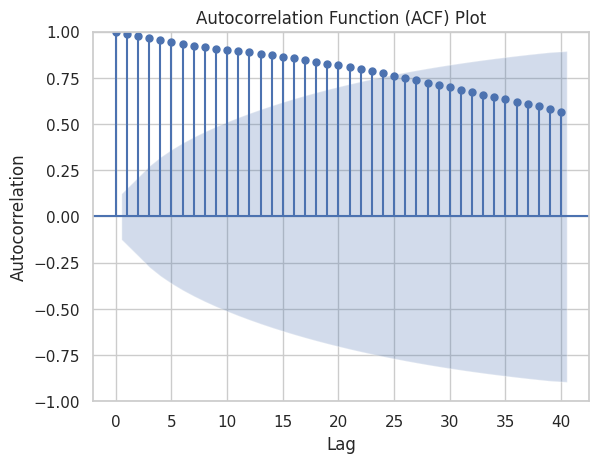

In [8]:
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(df['High'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

**Step 7: Testing Stationarity with ADF test**

An **Augmented Dickey-Fuller (ADF) test** is a statistical test used to determine if a time series is stationary.

*   **Purpose**: It checks for the presence of a unit root, which indicates non-stationarity.
*   **Null Hypothesis (H0)**: The time series has a unit root (is non-stationary).
*   **Alternative Hypothesis (H1)**: The time series does not have a unit root (is stationary).
*   **Interpretation**: If the p-value is below a chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude the series is stationary. Otherwise, it's considered non-stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.7890070037380479
p-value: 0.8223298689697234
Critical Values: {'1%': np.float64(-3.4568881317725864), '5%': np.float64(-2.8732185133016057), '10%': np.float64(-2.5729936189738876)}


### ADF Test Code and Output Explanation:

*   **Code (`adfuller(df['High'])`)**: Performs the Augmented Dickey-Fuller test on the 'High' price time series to check for stationarity.
*   **ADF Statistic (-0.789)**: The test value. If it's more negative than critical values, it suggests stationarity.
*   **p-value (0.822)**: The probability of observing data as extreme as, or more extreme than, the observed data, assuming the null hypothesis (non-stationarity) is true.
*   **Critical Values**: Thresholds for different significance levels (e.g., -2.873 for 5%).

**Interpretation of Output**:

*   Since the **p-value (0.822)** is much **greater than 0.05**, and the **ADF Statistic (-0.789)** is **greater** than the critical values (e.g., -2.873 at 5%), we **fail to reject the null hypothesis**.
*   **Conclusion**: The 'High' price time series is **non-stationary** (it has a unit root), meaning its statistical properties change over time.

**Step 8: Differencing to Achieve Stationarity**

**Differencing** is a technique used in time series analysis to transform a non-stationary series into a stationary one.

*   It involves subtracting a past observation from the current one (e.g., `Yt - Yt-1`).
*   **Purpose**: To remove trends, seasonality, and stabilize the mean of the time series, making it suitable for many forecasting models that require stationarity.

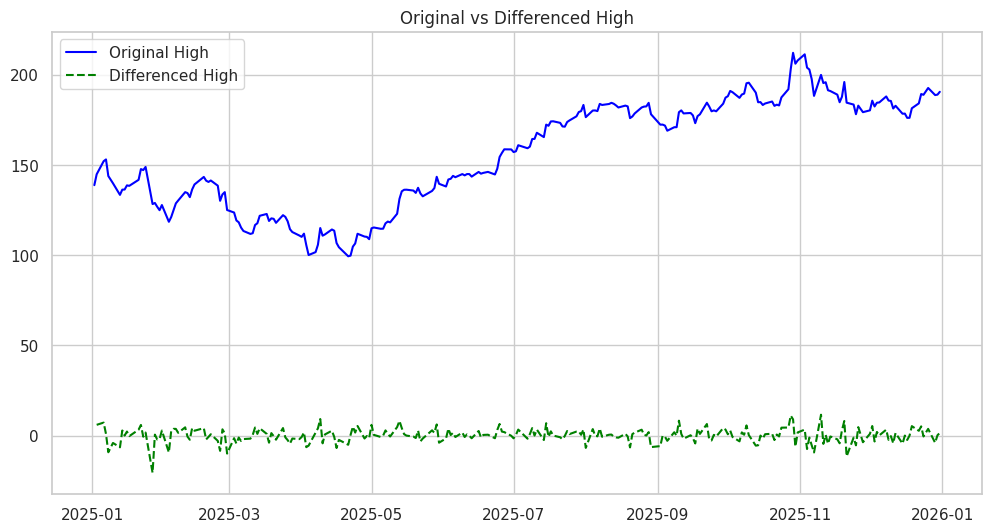

In [10]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

**Step 9: Smoothing Data with Moving Average**

df['High'].diff(): helps in calculating the difference between consecutive values in the High column. This differencing operation is used to transform a time series into a new series that represents the changes between consecutive observations.

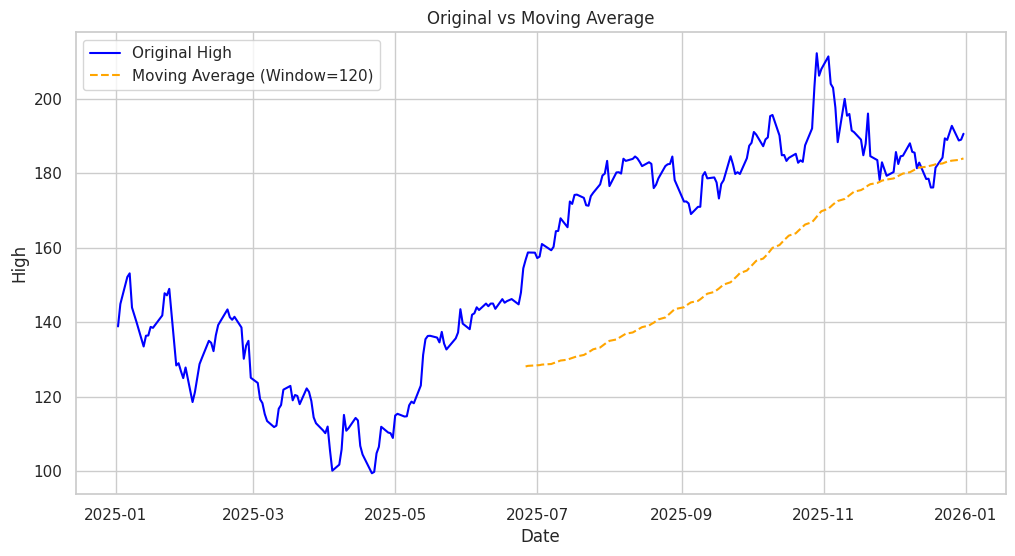

In [11]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

**Step 10: Original Data Vs Differenced Data**

Printing the original and differenced data side by side we get:

In [12]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

                  High  high_diff
Date                             
2025-01-02  138.842022        NaN
2025-01-03  144.860371   6.018349
2025-01-06  152.118394   7.258023
2025-01-07  153.088122   0.969728
2025-01-08  143.910632  -9.177490


### Explanation of `df_combined`:

*   **`df['High']`**: The original 'High' price series.
*   **`df['high_diff']`**: The 'High' price series after **differencing** (current High - previous High).
*   **`pd.concat([...], axis=1)`**: Combines these two series side-by-side into a new DataFrame `df_combined`.

### Output Interpretation:

*   The output shows the **Original High Price** alongside its **Daily Difference**.
*   The `NaN` for the first `high_diff` value is because there's no previous day's data to calculate the difference from.

In [13]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

,high_diff
Date,
2025-01-03,6.018349
2025-01-06,7.258023
2025-01-07,0.969728
2025-01-08,-9.177490
2025-01-10,-4.028885


In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -15.536011425886723
p-value: 2.1896954546296017e-28
Critical Values: {'1%': np.float64(-3.4569962781990573), '5%': np.float64(-2.8732659015936024), '10%': np.float64(-2.573018897632674)}


Based on the ADF Statistic we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis.

1. Handling Missing Values and Outliers

#1.1 Forward Fill & Backward Fill

Forward Fill (ffill):
Fills missing values using the last known value.

Backward Fill (bfill):
Fills missing values using the next known value.

✅ Best Used:

Small missing intervals (minutes/hours).

Stable time series where values don’t change suddenly.

❌ Not Suitable:

Large missing gaps.

Data with sudden trend changes (e.g., weather, crashes).

📌 Example:

Missing stock price for a day → fill using previous day’s price.

#1.2 Interpolation

Interpolation estimates missing values using surrounding data points.
Most common: Linear interpolation (straight-line estimation).

✅ Best Used:

Small, evenly spaced gaps.

Sensor or financial data with smooth changes.

❌ Not Suitable:

Large or irregular gaps.

Highly volatile data.

📌 Example:

Missing trading-day value estimated using previous and next day prices.

#1.3 Outlier Detection

Outlier detection identifies extreme values that deviate strongly from the data trend.

🔧 Common Techniques:

Z-score method

Rolling window statistics

🎯 Purpose:

Prevent distorted analysis.

Improve model accuracy.

Reduce noise and errors.

2. Transformations for Stability

Used to stabilize variance, improve stationarity and make data suitable for modeling.

2.1 Log Transformation

Applies logarithm to reduce effect of large values.

Best used:

Exponential growth data

Increasing variance with mean (heteroscedasticity)

Not suitable:

Zero or negative values

Example:

Log(stock prices) to stabilize variance

2.2 Box-Cox Transformation

Family of power transformations to normalize data and stabilize variance.

Best used:

When log transform is insufficient

Non-normal data with varying variance

Not suitable:

Data already normal

Zero or negative values

Example:

Financial data with changing volatility

2.3 Scaling (Standardization / Min-Max)

Adjusts data range for fair feature contribution.

Types:

Standardization: mean = 0, std = 1

Min-Max: range = 0 to 1

Best used:

ML models (NNs, distance-based models)

Features with different scales

Not suitable:

Data with strong outliers (Min-Max sensitive)

Example:

Scaling features before neural networks

3. Lag Features & Rolling Statistics

Capture temporal dependency, trends and seasonality.

3.1 Lag Features

Uses past values as predictors.

Best used:

Autocorrelated time series

ARIMA-type models

Not suitable:

No dependency on past values

Example:

Yesterday’s sales → today’s forecast

3.2 Rolling Mean & Rolling Std

Smooths time series using a sliding window.

Best used:

Trend & seasonality detection

Stationarity checking

Not suitable:

Very large window (hides short-term changes)

Example:

Monthly sales trend using rolling mean

4. Advanced Statistical Tests

Used to validate assumptions and model adequacy.

4.1 KPSS Test

Tests stationarity around a trend.

Best used:

Along with ADF for confirmation

Not suitable:

When stationarity is already confirmed

Example:

Use KPSS after ADF on financial data

4.2 Ljung-Box Test

Checks if residuals are white noise.

Best used:

After ARIMA/SARIMA fitting

Not suitable:

Deep learning models (LSTM, GRU)

Example:

Validate ARIMA residuals

5. Forecasting Models

Used to predict future time series values.

Statistical Models

ARIMA: Trend + autocorrelation (non-seasonal)

SARIMA: ARIMA + seasonality

Holt-Winters: Level, trend & seasonality

Machine Learning / Deep Learning

Random Forest: Non-linear patterns using lag features

LSTM / GRU: Long-term dependencies in sequences

📌 Note: ML models require feature engineering (lags, rolling stats).